# 과제 1

## requests 라이브러리를 활용하여 Naver API 활용하기
특정 검색어(Query)를 Naver News에서 검색한 결과를 통해 최신순 10개의 기사 url 출력하기

___

### #API 란?
*URI*에 *HTTP METHOD*로 요청된 정보를 응답(Response)으로 돌려주는 서비스<br><br>
   API를 이용?<br>
   &nbsp;&nbsp;&nbsp;해당 회사에서 제공하는 URI에 HTTP METHOD 를 통해 원하는 정보를 요청(Request)하는 것<br>
   API를 구축?<br>
   &nbsp;&nbsp;&nbsp;제공할 정보를 URI를 통해 응답(Response)으로 돌려주도록 서버를 구현하고 안내하는 것<br>
   
   REST API<br>
   &nbsp;&nbsp;&nbsp;[http://meetup.toast.com/posts/92] 참고

### #JSON / XML?
제공할 정보를 표현하는 여러가지 양식<br><br>
   JSON<br>
   &nbsp;&nbsp;&nbsp;프로그래밍에서 사용하기 좋게 key-value 형태로 표현된 데이터<br>
```
{
   "totalSize" : 2,
   "data" : [
       {
           "index" : 1,
           "value" : "hello"
       },
       {
           "index" : 2,
           "value" : "bye"
       }
   ]
}
```
   XML<br>
   &nbsp;&nbsp;&nbsp;태그 형태로 표현된 데이터<br>
```
<?xml version="1.0" encoding="UTF-8"?>
<totalSize>2</totalSize>
<data>
   <index>1</index>
   <value>hello</value>
</data>
<data>
   <index>2</index>
   <value>bye</value>
</data>
```

##### requests 활용
requests 라이브러리는 특정 url에 요청을 보낼 수 있도록 특화된 라이브러리

<b>get()</b> : URL에 요청을 보냄 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>RETURN</b> : 응답코드, 데이터<br>


<b>응답코드</b> : 요청을 보낸 서버의 상태를 의미하는 코드<br>
<b>데이터</b> : HTML 코드 / json / xml / ...

<b>get(url, params)</b> : params(Dict)를 이용하여 get방식으로 URL에 요청을 보냄 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>RETURN</b> : 응답코드, 데이터<br>

<b>post(url, data)</b> : data(Dict)를 이용하여 post방식으로 URL에 요청을 보냄 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>RETURN</b> : 응답코드, 데이터<br>

<b>get/post(url, header)</b> : header(Dict)를 이용하여 get/post방식으로 URL에 요청을 보냄 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>RETURN</b> : 응답코드, 데이터<br>

In [ ]:
import requests

resp = requests.get("http://www.naver.com")

#응답 코드
print(resp.status_code)

#데이터
print(resp.text)

#GET 방식
resp = requests.get("http://www.naver.com", params={"key" : "value"})

#응답 데이터가 json이라면
result = resp.json()
print(result)

### #Naver News API

<b>URL : </b><br>
https://openapi.naver.com/v1/search/news.json <br><br>

<b>Header :</b><br>
X-Naver-Client-Id<br>
X-Naver-Client-Secret<br><br>

<b>Get data :</b><br>
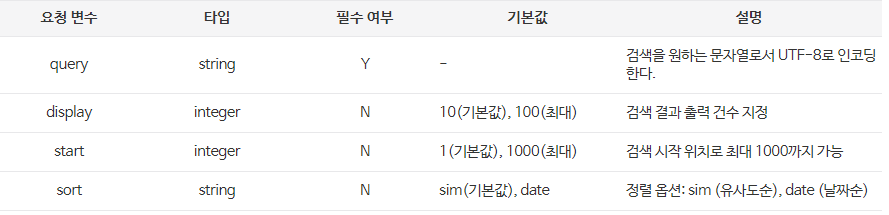



# 과제 2

## requests 와 BeautifulSoup 라이브러리를 활용하여 기사 내용 크롤링하기
각 언론사의 HTML 코드를 requests를 통해 받아온 후 BeautifulSoup를 통해 기사 내용을 가져오기
___

### #HTML 이란?
*웹페이지*를 구성하는 마크업 언어로 < TAG_NAME PROPERTY1=VALUE1 ...> < /TAG_NAME> 와 같이 나타난다.<br><br>
   파싱(Parsing)?<br>
   &nbsp;&nbsp;&nbsp;문자열에서 원하는 부분을 추출하는 것<br>
   
### #BeautifulSoup 사용법?
```
from bs4 import BeautifulSoup
soup = BeautifulSoup(HTML코드, "html.parser")
tag = soup.find(TAG_NAME, {PROPERTY1:VALUE1, ...})
print(tag.text)
```

In [13]:
from bs4 import BeautifulSoup
soup = BeautifulSoup("<html><head><title>TEST</title></head><body><div class='content'>기사내용</div></body></html>", "html.parser")

div = soup.find("div", {"class" : "content"})
print(div.text)

기사내용


# 과제 3

## Wit Application을 생성하고 Wit 라이브러리를 이용하여 Entity 추출하기
https://wit.ai/ 에서 Wit Application을 생성하고 학습시키기

Wit 라이브러리를 이용해 문자열을 Wit Application에 전송하여 Entity 추출한 결과 확인하기
___

### #Wit 이란?
*딥러닝*을 이용하여 자연어 내부에서 특정 Entity 를 추출할 수 있도록 학습하는 어플리케이션.<br><br>
   
### #Wit 사용법?
```
from wit import Wit
client = Wit("Secret Code")
res = client.message("보낼 문자열")
print(res)

```

In [15]:
from wit import Wit
client = Wit("WHG2RRVUQMDEKFMJMWOUMJ722PBE36AM")
res = client.message("가격은 2300원 입니다.")

#print(res)
print(res["entities"]["amount_of_money"][0]["value"])

2300


# 과제 4

## PyMySQL 라이브러리를 이용해 DB에 연결하여 특정 문자열이 있는지 검사하기
https://wit.ai/ 에서 Wit Application을 생성하고 학습시키기

Wit 라이브러리를 이용해 문자열을 Wit Application에 전송하여 Entity 추출한 결과 확인하기
___

### #PyMySQL 사용법?
```
conn = pymysql.connect(host="주소", user="아이디", password="비밀번호", port=포트번호, database="DB이름",charset="utf8mb4")
with conn.cursor() as cursor:
    sql = "SQL 쿼리"
    cursor.execute(sql, (쿼리에 넣을 값,))
    res = cursor.fetchall()

```

### #PyMySQL 에서 Query 사용법?
```
sql = "SELECT column_name FROM table_name WHERE column_name1=%s AND column_name2=%s"<br>
cursor.execute(sql, (value1, value2))<br>
```


In [ ]:
import pymysql
conn = pymysql.connect(host="sic.hanyang.ac.kr", user="jun6139", password="1234", port=8080, database="news",
                       charset="utf8mb4")

with conn.cursor() as cursor:
    sql = "SELECT * from article_entries WHERE pUrl = %s"
    cursor.execute(sql, (url,))
    res = cursor.fetchall()
    if len(res) > 0:
        print("이미 있음")

# 과제 5

## Flask 라이브러리를 이용하여 특정 url에 request하면 hello world 라고 response 보내기
API를 구성하기
___
